In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data = pd.read_csv('dataset/car_data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#We need to apply binarization to the categorical data to encode it. 

car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}, 'Seller_Type':{'Dealer':0, 'Individual':1}, 'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [10]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
#Splitting the Data to get the data and target
x = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=8)

In [13]:
#Model training

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
#Prediction and accuracy

training_pred = model.predict(x_train)
testing_pred = model.predict(x_test)

re_train = metrics.r2_score(y_train, training_pred)
re_test = metrics.r2_score(y_test, testing_pred)

print('R^2 Error on Training: ', re_train)
print('R^2 Error On Testing: ', re_test)


R^2 Error on Training:  0.8922885620619502
R^2 Error On Testing:  0.7709576618204602


Text(0.5, 1.0, 'Training: Actual Price Vs Predicted Price')

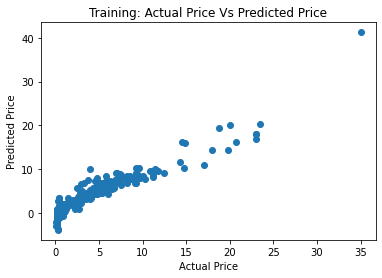

In [22]:
plt.scatter(y_train, training_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training: Actual Price Vs Predicted Price')


Text(0.5, 1.0, 'Testing: Actual Price Vs Predicted Price')

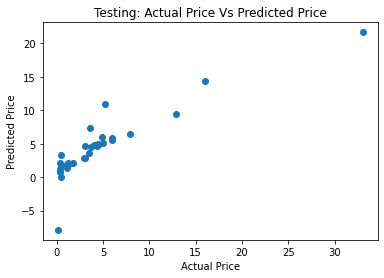

In [23]:
plt.scatter(y_test, testing_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing: Actual Price Vs Predicted Price' )


In [29]:
#Lasso Regression

lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [30]:
train_pred = lasso_model.predict(x_train)
test_pred = lasso_model.predict(x_test)

re_train_lasso = metrics.r2_score(y_train, train_pred)
re_test_lasso = metrics.r2_score(y_test, test_pred)

print('R^2 Error on Training: ', re_train_lasso)
print('R^2 Error On Testing: ', re_test_lasso)

R^2 Error on Training:  0.8501646920484058
R^2 Error On Testing:  0.7282432560306717


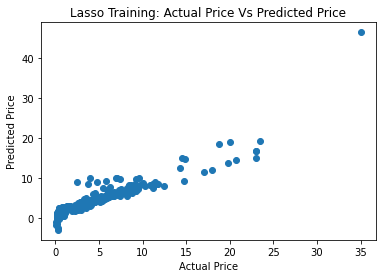

In [31]:
plt.scatter(y_train, train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Training: Actual Price Vs Predicted Price')
plt.show()

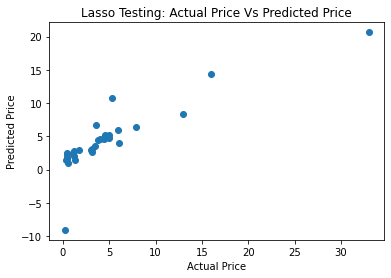

In [34]:
plt.scatter(y_test, test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Testing: Actual Price Vs Predicted Price')
plt.show()